In [1]:
import os
import json
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vocab = {}
comments = []
with open('Simplified_Chinese_LIWC2015_Dictionary.dic') as f:
    lines = f.readlines()
    for line in lines[:83]:
        comments.append(line)
    for line in lines[83:]:
        x = line.strip().split('\t')
        vocab[x[0]] = x[1:]
print(len(vocab))

9720


In [3]:
vector_names = ['zhihu', 'renmin', 'weibo', 'literature', 'wiki', 'sogou', 'baidu']
extended_list = []
for name in vector_names:
    with open('./extended_vocab/extended_{}_100.json'.format(name), 'r') as f:
        extended_list.append(json.load(f))

In [4]:
def get_counts(topn, threshold):
    counts = {}
    for word in vocab.keys():
        for extended in extended_list:
            if word in extended:
                for word_sim_pair in extended[word][:topn]:
                    new_word = word_sim_pair[0]
                    similarity = word_sim_pair[1]
                    if new_word not in vocab and similarity > threshold:
                        if word not in counts:
                            counts[word] = {}
                        if new_word not in counts[word]:
                            counts[word][new_word] = 1
                        else:
                            counts[word][new_word] += 1
    return counts

In [5]:
def remove_single_appearance(counts):
    extension = {}
    for word in counts:
        for new_word in counts[word]:
            if counts[word][new_word] > 1:
                extension.setdefault(word, []).append(new_word)
    return extension

In [6]:
def get_all_extensions(topns, thresholds):
    all_extensions = {}
    for topn in topns:
        for threshold in thresholds:
            print('Getting topn={} and threshold={}'. format(topn, threshold))
            counts = get_counts(topn, threshold)
            all_extensions['{}_{}'.format(topn, threshold)] = remove_single_appearance(counts)
    return all_extensions

In [7]:
def generate_new_vocab(vocab, extensions):
    new_vocab = copy.deepcopy(vocab)
    for word in extensions:
        for new_word in extensions[word]:
            new_vocab.setdefault(new_word, [])
            new_vocab[new_word] += vocab[word]
    return new_vocab

In [8]:
def generate_all_new_vocab(vocab, all_extensions):
    with open("./vocab/old_vocab.dic", "w", encoding='utf8') as f:
        f.writelines(comments)
        seq = ['\t'.join([word] + vocab[word])+'\n' for word in vocab]
        f.writelines(seq)
    for parameter in all_extensions:
        new_vocab = generate_new_vocab(vocab, all_extensions[parameter])
        with open("./vocab/new_vocab_{}.dic".format(parameter), "w", encoding='utf8') as f:
            f.writelines(comments)
            seq = ['\t'.join([word] + new_vocab[word])+'\n' for word in new_vocab]
            f.writelines(seq)

In [9]:
topns = [25, 50, 75, 100]
thresholds = [0.7, 0.75, 0.8, 0.85]

In [10]:
all_extensions = get_all_extensions(topns, thresholds)

Getting topn=25 and threshold=0.7
Getting topn=25 and threshold=0.75
Getting topn=25 and threshold=0.8
Getting topn=25 and threshold=0.85
Getting topn=50 and threshold=0.7
Getting topn=50 and threshold=0.75
Getting topn=50 and threshold=0.8
Getting topn=50 and threshold=0.85
Getting topn=75 and threshold=0.7
Getting topn=75 and threshold=0.75
Getting topn=75 and threshold=0.8
Getting topn=75 and threshold=0.85
Getting topn=100 and threshold=0.7
Getting topn=100 and threshold=0.75
Getting topn=100 and threshold=0.8
Getting topn=100 and threshold=0.85


In [11]:
generate_all_new_vocab(vocab, all_extensions)

In [12]:
word_types = [
1, # function (Function Words)
	2, # pronoun (Pronouns)
		3, # ppron (Personal Pronouns)
			4, # i (I)
			5, # we (We)
			6, # you (You)
			7, # shehe (SheHe)
			8, # they (They)
			19, # youpl
		9, # ipron (Impersonal Pronouns)
	11, # prep (Prepositions)
	12, # auxverb (Auxiliary Verbs)
	13, # adverb (Adverbs)
	14, # conj (Conjunctions)
	15, # negate (Negations)
	17, # quanunit
	18, # prepend
	131, # specart
	132, # tensem
		90, # focuspast (Past Focus)
		91, # focuspresent (Present Focus)
		92, # focusfuture (Future Focus)
		133, # progm
	140, # particle
		141, # modal_pa
		142, # general_pa
# othergram (Other Grammar)
	22, # compare (Comparisons)
	23, # interrog (Interrogatives)
	24, # number (Numbers)
	25, # quant (Quantifiers)
30, # affect (Affect)
	31, # posemo (Positive Emotions)
	32, # negemo (Negative Emotions)
		33, # anx (Anx)
		34, # anger (Anger)
		35, # sad (Sad)
40, # social (Social)
	41, # family (Family)
	42, # friend (Friends)
	43, # female (Female)
	44, # male (Male)
50, # cogproc (Cognitive Processes)
	51, # insight (Insight)
	52, # cause (Causal)
	53, # discrep (Discrepancies)
	54, # tentat (Tentative)
	55, # certain (Certainty)
	56, # differ (Differentiation)
60, # percept (Perceptual Processes)
	61, # see (See)
	62, # hear (Hear)
	63, # feel (Feel)
70, # bio (Biological Processes)
	71, # body (Body)
	72, # health (Health)
	73, # sexual (Sexual)
	74, # ingest (Ingest)
80, # drives (Drives)
	81, # affiliation (Affiliation)
	82, # achieve (Achievement)
	83, # power (Power)
	84, # reward (Reward)
	85, # risk (Risk)
100, # relativ (Relativity)
	101, # motion (Motion)
	102, # space (Space)
	103, # time (Time)
# persconc (Personal Concerns)
	110, # work (Work)
	111, # leisure (Leisure)
	112, # home (Home)
	113, # money (Money)
	114, # relig (Religion)
	115, # death (Death)
120, # informal (Informal Language)
	121, # swear (Swear)
	122, # netspeak (Netspeak)
	123, # assent (Assent)
	124, # nonflu (Nonfluencies)
	125, # filler (Filler Words)
]

In [13]:
vocabs = {}
new_vocab_names = ['new_vocab_{}_{}'.format(topn, thresh) for topn in topns for thresh in thresholds]
vocab_names = new_vocab_names + ['old_vocab']
vocabs_dir_path = './vocab'
for vocab_name in vocab_names:
    with open(os.path.join(vocabs_dir_path, vocab_name+'.dic'), 'r', encoding='utf-8') as f:
        vocab = {}
        for line in f.readlines()[83:]:
            x = line.strip().split('\t')
            vocab[x[0]] = x[1:]
        vocabs[vocab_name] = vocab

In [14]:
word_type_counts = {}
for vocab_name in vocab_names:
    word_type_counts[vocab_name] = {}
    for word_type in word_types:
        word_type_counts[vocab_name][word_type] = 0

In [15]:
for vocab_name in vocab_names:
    for word in vocabs[vocab_name]:
        for word_type in vocabs[vocab_name][word]:
            word_type_counts[vocab_name][int(word_type)] += 1

In [16]:
columns = ['{}_{}'.format(topn, thresh) for topn in topns for thresh in thresholds]
old_vocab_counts = pd.Series(word_type_counts['old_vocab'])
increase = pd.DataFrame(columns=columns)
for col in columns:
    new_vocab_name = 'new_vocab_' + col
    increase[col] = pd.Series(word_type_counts[new_vocab_name]) - old_vocab_counts

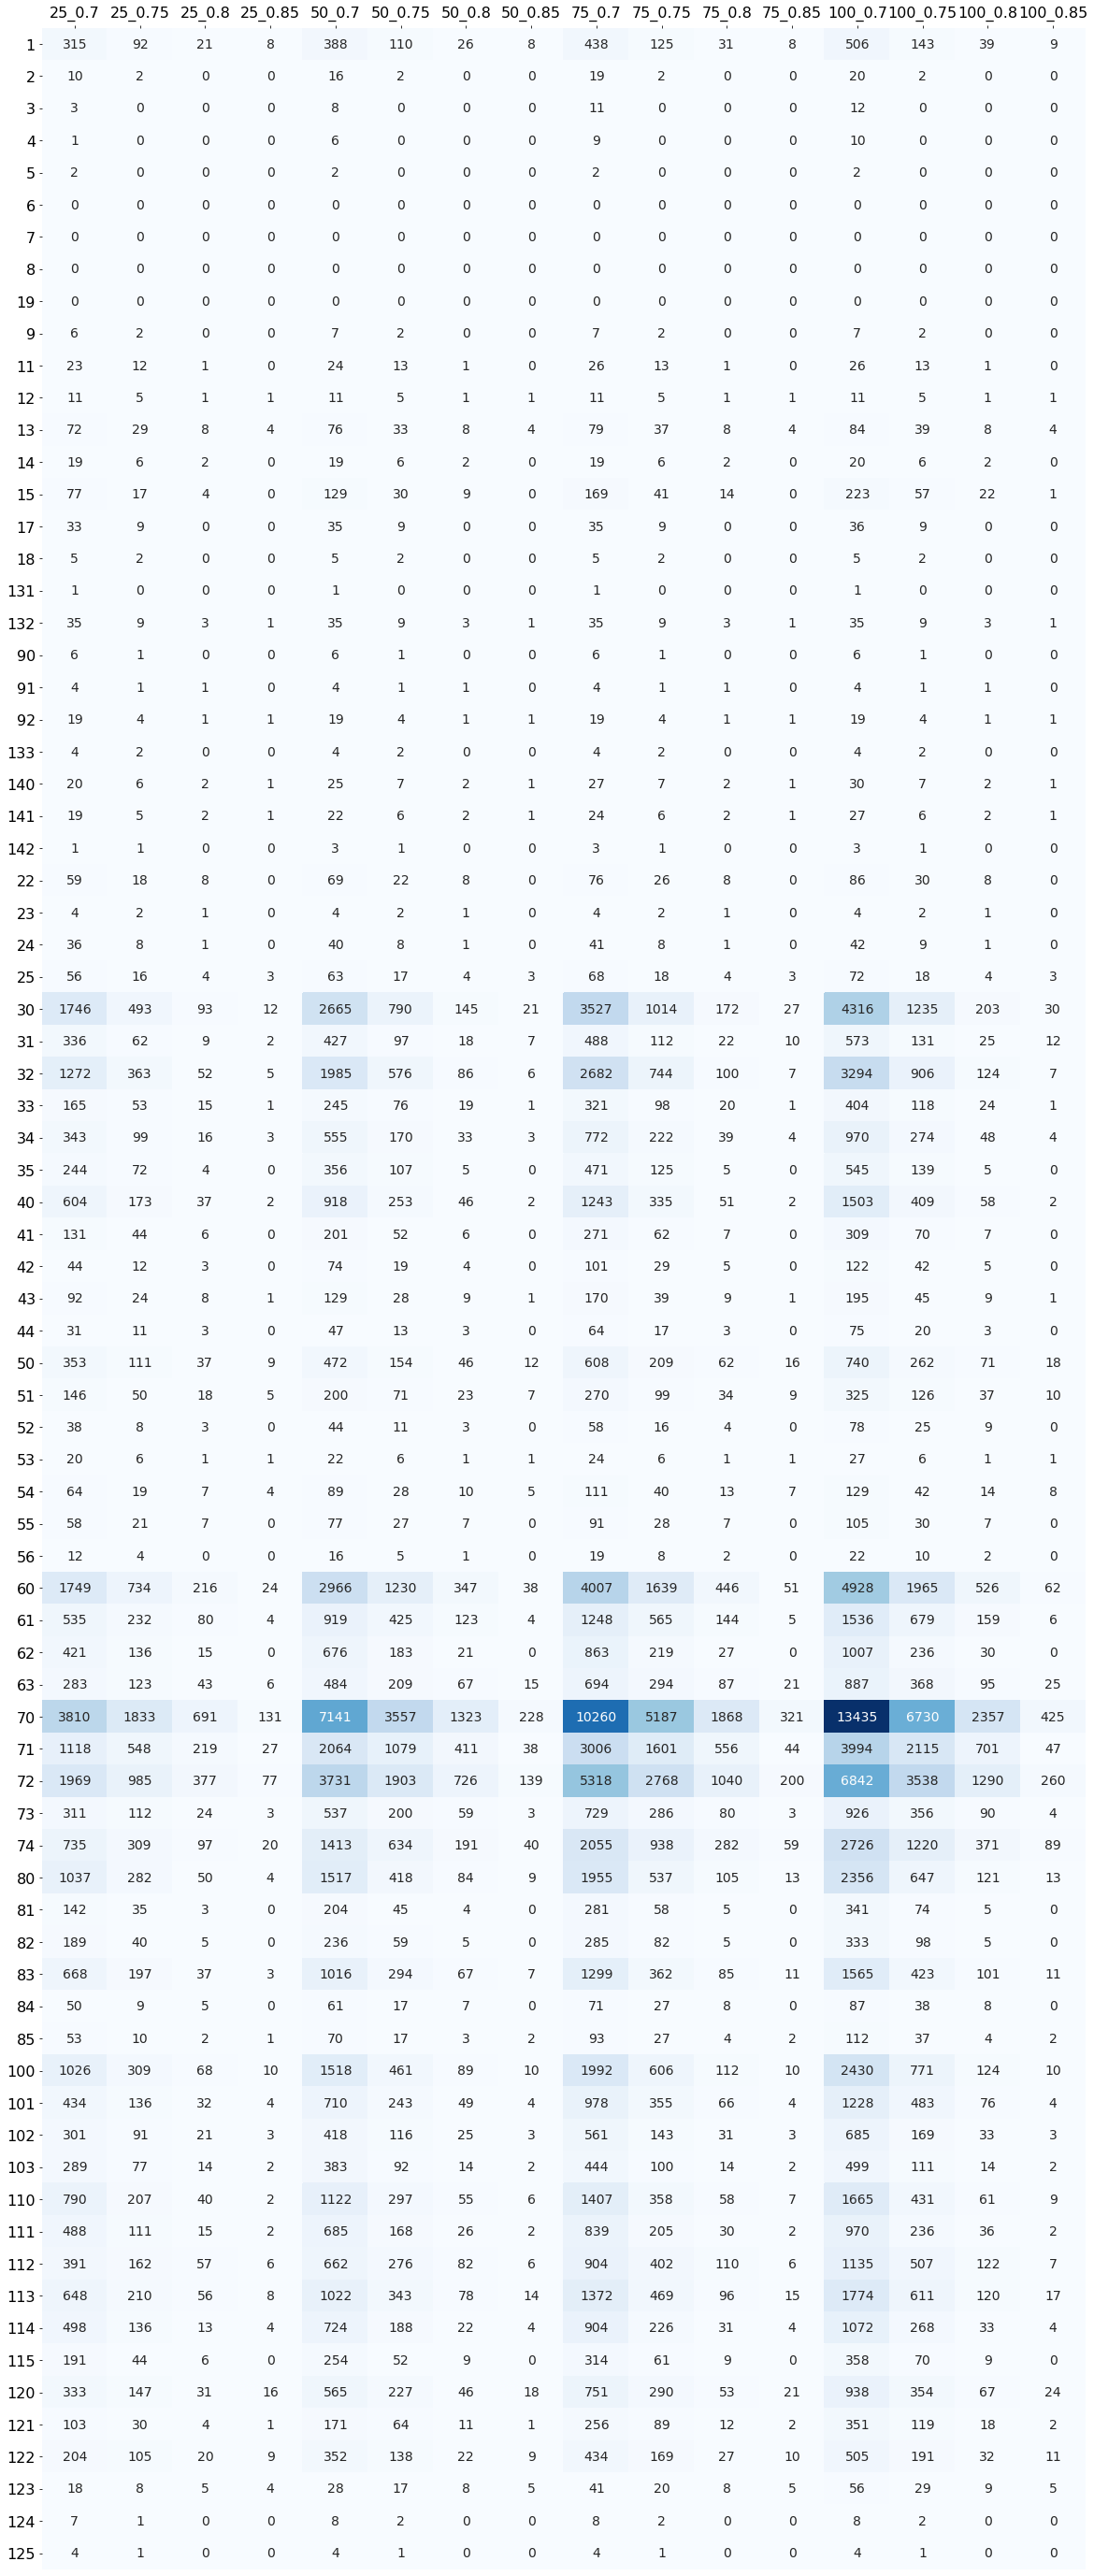

In [17]:
plt.figure(figsize=(20,50))
ax = sns.heatmap(increase, annot=True, cbar=False, fmt='g', annot_kws={'size':14}, cmap=plt.cm.get_cmap('Blues'))

ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_ymajorticklabels(), rotation=0, fontsize=16);